# Data Privacy & Compliance – GDPR "Right to Explanation"

**Objective:**  
Demonstrate how a simple medical ML model can be explained using SHAP and show how PII removal/anonymization affects model predictions.

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import shap
import matplotlib.pyplot as plt

## Generate Synthetic Dataset

We simulate a medical dataset with 10 features, including a sensitive feature `sex`.

In [13]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

feature_names = [f"feature_{i}" for i in range(10)]
X = pd.DataFrame(X, columns=feature_names)

np.random.seed(42)
X['sex'] = np.random.randint(0, 2, size=X.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sensitive_feature = 'sex'

## Train Random Forest Model

A simple Random Forest Classifier is used to predict heart disease. This model is compatible with SHAP for explanations.

In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.92


## Explain Predictions using SHAP

SHAP (SHapley Additive exPlanations) helps provide global and individual explanations.  
We will visualize how each feature, including the sensitive feature `sex`, affects the model.

C:\Users\dalro\AppData\Local\Temp\ipykernel_31364\2671530038.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)
c:\Users\dalro\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
c:\Users\dalro\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


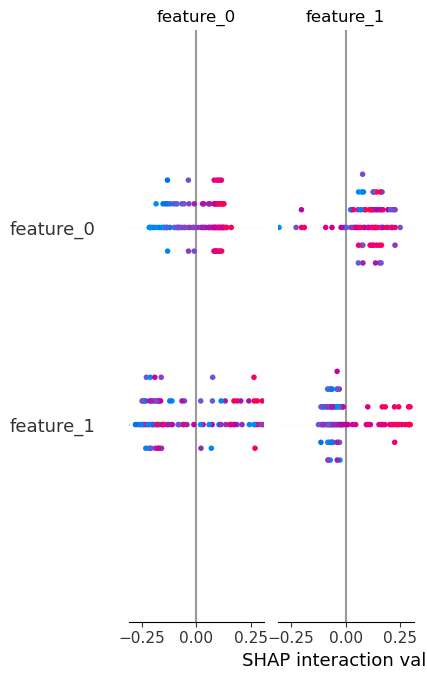

In [15]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

## Demonstrate PII Removal / Anonymization

We remove the sensitive feature `sex` and retrain the model to see the impact on predictions.

In [16]:
X_train_no_pi = X_train.drop(columns=[sensitive_feature])
X_test_no_pi = X_test.drop(columns=[sensitive_feature])

model_no_pi = RandomForestClassifier(n_estimators=100, random_state=42)
model_no_pi.fit(X_train_no_pi, y_train)

pred_original = model.predict(X_test)
pred_no_pi = model_no_pi.predict(X_test_no_pi)

comparison = pd.DataFrame({
    "Original": pred_original[:10],
    "No PII": pred_no_pi[:10]
})
comparison

,Original,No PII
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,0,1
7,1,1
8,0,0
9,0,0


## Analysis & Discussion

**Feature Importance (Right to Explanation):**  
- The permutation importance plot shows which features contribute most to predictions.  
- The sensitive feature `sex` may influence decisions, highlighting the need for explainability under GDPR.

**Impact of PII Removal / Anonymization:**  
- Removing `sex` reduces privacy risk.  
- Some predictions change slightly, illustrating the trade-off between model accuracy and privacy.  

**Real-world implications:**  
- In medical AI systems, patients have a right to understand automated decisions (GDPR Art. 22).  
- PII must be protected (HIPAA/GDPR), while still maintaining model performance.  

This demonstration bridges policy requirements and technical implementation in an AI system.